# Portfolio optimization programing

## 1. Stock data of 5 companies

In [ ]:
!pip install quandl

In [ ]:
!pip install mplfinance

In [ ]:
!pip install fitter

In [ ]:
import quandl
QUANDL_API_KEY = 'wEBDF541doQ7iQkiFksT'  
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
# 1
df_appl = yf.download("AAPL", start="2017-01-01", end="2019-04-30")
# 2
df_micr = yf.download("MSFT", start="2017-01-01", end="2019-04-30")
# 3
df_cisc = yf.download("CSCO", start="2017-01-01", end="2019-04-30")
# 4
df_tesl = yf.download("TSLA", start="2017-01-01", end="2019-04-30")
# 5
df_orcl = yf.download("ORCL", start="2017-01-01", end="2019-04-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data = yf.download("AAPL MSFT CSCO TSLA ORCL", start="2017-01-01", end="2019-04-30")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_full = yf.download("AAPL MSFT CSCO TSLA ORCL", start="2017-01-01", end="2019-04-30")

[*********************100%***********************]  5 of 5 completed


In [ ]:
#df_test = pd.DataFrame(np.log(data) - np.log(data.shift(1)))
#df_test

In [ ]:
# เลือกข้อมูลเฉพาะส่วน Adj Colse
data = data["Adj Close"]
data

,AAPL,CSCO,MSFT,ORCL,TSLA
Date,,,,,
2017-01-03,27.372362,26.315329,58.291969,35.795979,43.397999
2017-01-04,27.341724,26.158899,58.031147,35.972408,45.397999
2017-01-05,27.480770,26.219732,58.031147,35.879543,45.349998
2017-01-06,27.787130,26.271877,58.534157,35.703121,45.801998
2017-01-09,28.041647,26.228422,58.347855,36.241684,46.256001
...,...,...,...,...,...
2019-04-23,50.643993,52.868286,122.040619,52.904736,52.779999
2019-04-24,50.565884,53.045479,121.622276,53.135849,51.731998
2019-04-25,50.106991,52.532555,125.650070,52.972141,49.526001


In [ ]:
data = data.pct_change()

In [ ]:
data = data.dropna()

## 2. Perform portfolio optimization

In [ ]:
# แสดงรายละเอียดขอ้มูล
data.describe()

,AAPL,CSCO,MSFT,ORCL,TSLA
count,582.000000,582.000000,582.000000,582.000000,582.000000
mean,0.001155,0.001271,0.001428,0.000765,0.000648
std,0.015541,0.013340,0.014091,0.013342,0.030590
min,-0.099607,-0.072147,-0.054338,-0.094322,-0.139015
25%,-0.005133,-0.004731,-0.004618,-0.004103,-0.014807
50%,0.001158,0.001465,0.001429,0.001431,0.000056
75%,0.008359,0.007606,0.008069,0.007038,0.016893
max,0.070422,0.055042,0.075705,0.085689,0.173471


In [ ]:
# covariance
cov = data.cov()

In [ ]:
# correlation
corr = data.corr()

In [ ]:
corr

,AAPL,CSCO,MSFT,ORCL,TSLA
AAPL,1.000000,0.543793,0.642016,0.383239,0.295191
CSCO,0.543793,1.000000,0.665177,0.460159,0.291083
MSFT,0.642016,0.665177,1.000000,0.514501,0.314211
ORCL,0.383239,0.460159,0.514501,1.000000,0.236128
TSLA,0.295191,0.291083,0.314211,0.236128,1.000000


In [ ]:
# Variance
data.var()

AAPL    0.000242
CSCO    0.000178
MSFT    0.000199
ORCL    0.000178
TSLA    0.000936
dtype: float64

In [ ]:
# expected return

Text(0, 0.5, 'daily returns')

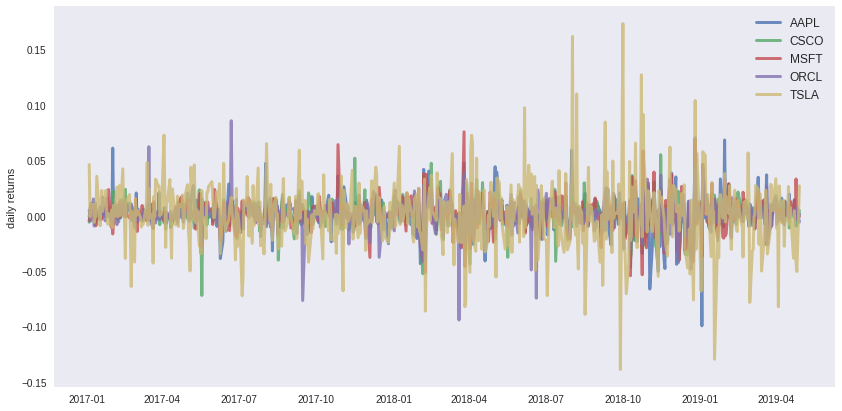

In [ ]:
import matplotlib.pyplot as plt
returns = data
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

วิเคราะห์ 

------------------------------
จะเห็นได้ว่าหุ้นแต่ละตัวต่างก็มี spike สูง หมายถึงว่าการผันผวนในแต่ละวันค่อนข้างสูงถ้าเราลงทุนในช่วงที่ spike พุ่งขึ้นแปลว่าเราจะได้กำไรเยอะ ในขณะเดียวกันถ้าลงทุนในช่วงที่พุ่งลงก็จะเสียทุน แต่เนื่องจากว่ามันไม่นิ่งเลยก็เลยเป๋นช่วงที่อาจจะยังไม่เหมาะที่จะลงทุน 

ในช่วงปี 2018 Tesla จะมีการแกว่งที่ค่อนข้างก็อาจจะเสี่ยงมากไปหน่อยหากลงทุนในช่วงนี้ ถ้ามองด้วยตาเปล่าก็ดูเหมือนว่า Microsoftt กับ Apple ไม่ค่อนเหวี่ยงเยอะ อาจจะเป็นหุ้นที่น่าลงทุน ทั้งนี้ก็ต้องดูประกอบร่วมกับข้อมูลอื่น

### 2.1 // m=0.1

In [ ]:
m =0.1 #minimum

In [ ]:
import numpy as np
# เอาค่า std ที่ได้จาก .describe() มาทำเป็น metrix
std= [6.405203,7.086673,18.058698,3.463687,7.010854]
SD = np.diag(std) 
SD

array([[ 6.405203,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  7.086673,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      , 18.058698,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  3.463687,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  7.010854]])

In [ ]:
# import pandas as pd
import pandas as pd
sd = pd.DataFrame(SD)
sd

,0,1,2,3,4
0,6.405203,0.000000,0.000000,0.000000,0.000000
1,0.000000,7.086673,0.000000,0.000000,0.000000
2,0.000000,0.000000,18.058698,0.000000,0.000000
3,0.000000,0.000000,0.000000,3.463687,0.000000
4,0.000000,0.000000,0.000000,0.000000,7.010854


In [ ]:
# อันนี้ทำ Unit Vector แบบ transpose
import numpy as np
one_tran = [[1,1,1,1,1]]
one_tran = np.array(one_tran)
one_tran

array([[1, 1, 1, 1, 1]])

In [ ]:
# อันนี้ทำ Unit vector ให้ชื่อว่า one
one = [[1],[1],[1],[1],[1]]
one = np.array(one)
one

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
# จากที่เราได้ Covariance ของ data มาแล้วแต่มันยังไม่อยู่ในรูปที่จะเอาไปคำนวณได้เลยใช้ to_numpy เข้ามาปรับ
cov = cov.to_numpy()

# ทีนี้ในสูตรด้านล่างจะมีใช้ inverse ของ cov เยอะ เลยทำใส่เป็นตัวแปร cov_inv
cov_inv = np.linalg.inv(cov) 

In [ ]:
# ลองปริ้นท์มาดู
cov

array([[2.41526045e-04, 1.12735215e-04, 1.40594579e-04, 7.94620860e-05,
        1.40333820e-04],
       [1.12735215e-04, 1.77945835e-04, 1.25032317e-04, 8.18954776e-05,
        1.18778854e-04],
       [1.40594579e-04, 1.25032317e-04, 1.98555422e-04, 9.67242217e-05,
        1.35437989e-04],
       [7.94620860e-05, 8.18954776e-05, 9.67242217e-05, 1.77998178e-04,
        9.63681471e-05],
       [1.40333820e-04, 1.18778854e-04, 1.35437989e-04, 9.63681471e-05,
        9.35740205e-04]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
# จากสูตร จะคำนวณ A ด้วยสูตรด้านล่างนี้
A = np.matmul(one_tran,cov_inv)
A = np.matmul(A,one)
A

array([[8159.52086181]])

In [ ]:
# ดู shape ของ A เพราะว่าเห็นมันเป็น Array ซ้อน ๆ กัน
A.shape

(1, 1)

In [ ]:
# ทีนี้ก็จะทำการดู mean ของ data
mean = data.mean()
mean

AAPL    0.001155
CSCO    0.001271
MSFT    0.001428
ORCL    0.000765
TSLA    0.000648
dtype: float64

In [ ]:
# mew ในที่นี้จะแทนด้วย u คือค่า mean ของแต่ละ asset
u = [[41.068366],[36.388711],[86.194422],[45.241459],[62.527403]]
u = np.array(u)
u

array([[41.068366],
       [36.388711],
       [86.194422],
       [45.241459],
       [62.527403]])

In [ ]:
# new transpose
u_tran = u.transpose()
u_tran

array([[41.068366, 36.388711, 86.194422, 45.241459, 62.527403]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
B = np.matmul(u_tran,cov_inv)

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124 (ต่อ)
B = np.matmul(B,one)
B

array([[371253.39924792]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
# จะได้สูตรคำนวณ C ดังนี้
C = np.matmul(u_tran,cov_inv)
C = np.matmul(C,u)

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 59/124
# จะได้สูตรหา lamda สำหรับไปคำนวณดังนี้
lamda = (A*m - B)/(A*C-B**2)
lamda

array([[-1.73247813e-06]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 59/124
# ได้สูตรคำนวณแกรมม่าดังนี้
gram = (C-B*m)/(A*C-B**2)
gram

array([[0.00020138]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 64/124
# ได้สูตรคำนวณหา weight ดังนี้
w = np.matmul(cov_inv,(lamda*u + gram*one))
w

array([[ 0.47501931],
       [ 0.82990991],
       [-0.87004395],
       [ 0.57560292],
       [-0.01048818]])

In [ ]:
w.sum()

0.9999999999999999

วิเคราะห์ 

------------------------------

จากผลที่ได้มานั้นจะเรียงหุ้นตามนี้ Apple, Cisco, Microsoft, Oracle, Tesla ซึ่งจากที่ได้มาคือตัวที่น่าลงทุนสุดเพื่อให้ได้ผลตอบแทนรวม 0.1 คือ Cisco โดยควรลงทุน 82% รองมาเป็น Oracle, Apple ลงทุน 57% และ 47% ตามลำดับ ซึ่งหมายถึงถ้าเรามีหุ้นอยู่ก็ควรขาย คือไม่ควรลงทุน จะเป็น Microsoft Tesla เพราะได้ weight ติดลบ

### 2.1 // m=0.2

In [ ]:
m =0.2 #minimum

In [ ]:
# เอาค่า std ที่ได้จาก .describe() มาทำเป็น metrix
std= [6.405203,7.086673,18.058698,3.463687,7.010854]
SD = np.diag(std) 
SD

array([[ 6.405203,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  7.086673,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      , 18.058698,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  3.463687,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  7.010854]])

In [ ]:
# import pandas as pd
import pandas as pd
sd = pd.DataFrame(SD)
sd

,0,1,2,3,4
0,6.405203,0.000000,0.000000,0.000000,0.000000
1,0.000000,7.086673,0.000000,0.000000,0.000000
2,0.000000,0.000000,18.058698,0.000000,0.000000
3,0.000000,0.000000,0.000000,3.463687,0.000000
4,0.000000,0.000000,0.000000,0.000000,7.010854


In [ ]:
# อันนี้ทำ Unit Vector แบบ transpose
import numpy as np
one_tran = [[1,1,1,1,1]]
one_tran = np.array(one_tran)
one_tran

array([[1, 1, 1, 1, 1]])

In [ ]:
# อันนี้ทำ Unit vector ให้ชื่อว่า one
one = [[1],[1],[1],[1],[1]]
one = np.array(one)
one

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:

# ทีนี้ในสูตรด้านล่างจะมีใช้ inverse ของ cov เยอะ เลยทำใส่เป็นตัวแปร cov_inv
cov_inv = np.linalg.inv(cov) 

In [ ]:
# ลองปริ้นท์มาดู
cov

array([[2.41526045e-04, 1.12735215e-04, 1.40594579e-04, 7.94620860e-05,
        1.40333820e-04],
       [1.12735215e-04, 1.77945835e-04, 1.25032317e-04, 8.18954776e-05,
        1.18778854e-04],
       [1.40594579e-04, 1.25032317e-04, 1.98555422e-04, 9.67242217e-05,
        1.35437989e-04],
       [7.94620860e-05, 8.18954776e-05, 9.67242217e-05, 1.77998178e-04,
        9.63681471e-05],
       [1.40333820e-04, 1.18778854e-04, 1.35437989e-04, 9.63681471e-05,
        9.35740205e-04]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
# จากสูตร จะคำนวณ A ด้วยสูตรด้านล่างนี้
A = np.matmul(one_tran,cov_inv)
A = np.matmul(A,one)
A

array([[8159.52086181]])

In [ ]:
# ดู shape ของ A เพราะว่าเห็นมันเป็น Array ซ้อน ๆ กัน
A.shape

(1, 1)

In [ ]:
# ทีนี้ก็จะทำการดู mean ของ data
mean = data.mean()
mean

AAPL    0.001155
CSCO    0.001271
MSFT    0.001428
ORCL    0.000765
TSLA    0.000648
dtype: float64

In [ ]:
# mew ในที่นี้จะแทนด้วย u คือค่า mean ของแต่ละ asset
u = [[41.068366],[36.388711],[86.194422],[45.241459],[62.527403]]
u = np.array(u)
u

array([[41.068366],
       [36.388711],
       [86.194422],
       [45.241459],
       [62.527403]])

In [ ]:
# new transpose
u_tran = u.transpose()
u_tran

array([[41.068366, 36.388711, 86.194422, 45.241459, 62.527403]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
B = np.matmul(u_tran,cov_inv)

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124 (ต่อ)
B = np.matmul(B,one)
B

array([[371253.39924792]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
# จะได้สูตรคำนวณ C ดังนี้
C = np.matmul(u_tran,cov_inv)
C = np.matmul(C,u)

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 59/124
# จะได้สูตรหา lamda สำหรับไปคำนวณดังนี้
lamda = (A*m - B)/(A*C-B**2)
lamda

array([[-1.72866205e-06]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 59/124
# ได้สูตรคำนวณแกรมม่าดังนี้
gram = (C-B*m)/(A*C-B**2)
gram

array([[0.00020121]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 64/124
# ได้สูตรคำนวณหา weight ดังนี้
w = np.matmul(cov_inv,(lamda*u + gram*one))
w

array([[ 0.47432812],
       [ 0.82880356],
       [-0.86793062],
       [ 0.57524234],
       [-0.01044339]])

In [ ]:
w.sum()

1.0000000000000002

วิเคราะห์ 

------------------------------

ที่นี้เราจะมาลองดู ถ้าหากเราตัง้ไว้ว่าอยากได้ผลตอบแทนรวมของ Portfolio เป็น 0.2 จะเห็นได้ว่ายังเหมือนเดิมคือควรลงทุนที่ Cisco มากที่สุด แล้วหลังจากเปลี่ยน m มามันไม่ค่อยเปลี่ยนค่าเท่าไหร่

### 2.1 // m=0.3

In [ ]:
m =0.3 #minimum

In [ ]:
# เอาค่า std ที่ได้จาก .describe() มาทำเป็น metrix
std= [6.405203,7.086673,18.058698,3.463687,7.010854]
SD = np.diag(std) 
SD

array([[ 6.405203,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  7.086673,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      , 18.058698,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  3.463687,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  7.010854]])

In [ ]:
# import pandas as pd
import pandas as pd
sd = pd.DataFrame(SD)
sd

,0,1,2,3,4
0,6.405203,0.000000,0.000000,0.000000,0.000000
1,0.000000,7.086673,0.000000,0.000000,0.000000
2,0.000000,0.000000,18.058698,0.000000,0.000000
3,0.000000,0.000000,0.000000,3.463687,0.000000
4,0.000000,0.000000,0.000000,0.000000,7.010854


In [ ]:
# อันนี้ทำ Unit Vector แบบ transpose
import numpy as np
one_tran = [[1,1,1,1,1]]
one_tran = np.array(one_tran)
one_tran

array([[1, 1, 1, 1, 1]])

In [ ]:
# อันนี้ทำ Unit vector ให้ชื่อว่า one
one = [[1],[1],[1],[1],[1]]
one = np.array(one)
one

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:

# ทีนี้ในสูตรด้านล่างจะมีใช้ inverse ของ cov เยอะ เลยทำใส่เป็นตัวแปร cov_inv
cov_inv = np.linalg.inv(cov) 

In [ ]:
# ลองปริ้นท์มาดู
cov

array([[2.41526045e-04, 1.12735215e-04, 1.40594579e-04, 7.94620860e-05,
        1.40333820e-04],
       [1.12735215e-04, 1.77945835e-04, 1.25032317e-04, 8.18954776e-05,
        1.18778854e-04],
       [1.40594579e-04, 1.25032317e-04, 1.98555422e-04, 9.67242217e-05,
        1.35437989e-04],
       [7.94620860e-05, 8.18954776e-05, 9.67242217e-05, 1.77998178e-04,
        9.63681471e-05],
       [1.40333820e-04, 1.18778854e-04, 1.35437989e-04, 9.63681471e-05,
        9.35740205e-04]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
# จากสูตร จะคำนวณ A ด้วยสูตรด้านล่างนี้
A = np.matmul(one_tran,cov_inv)
A = np.matmul(A,one)
A

array([[8159.52086181]])

In [ ]:
# ดู shape ของ A เพราะว่าเห็นมันเป็น Array ซ้อน ๆ กัน
A.shape

(1, 1)

In [ ]:
# ทีนี้ก็จะทำการดู mean ของ data
mean = data.mean()
mean

AAPL    0.001155
CSCO    0.001271
MSFT    0.001428
ORCL    0.000765
TSLA    0.000648
dtype: float64

In [ ]:
# mew ในที่นี้จะแทนด้วย u คือค่า mean ของแต่ละ asset
u = [[41.068366],[36.388711],[86.194422],[45.241459],[62.527403]]
u = np.array(u)
u

array([[41.068366],
       [36.388711],
       [86.194422],
       [45.241459],
       [62.527403]])

In [ ]:
# new transpose
u_tran = u.transpose()
u_tran

array([[41.068366, 36.388711, 86.194422, 45.241459, 62.527403]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
B = np.matmul(u_tran,cov_inv)

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124 (ต่อ)
B = np.matmul(B,one)
B

array([[371253.39924792]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 63/124
# จะได้สูตรคำนวณ C ดังนี้
C = np.matmul(u_tran,cov_inv)
C = np.matmul(C,u)

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 59/124
# จะได้สูตรหา lamda สำหรับไปคำนวณดังนี้
lamda = (A*m - B)/(A*C-B**2)
lamda

array([[-1.72484597e-06]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 59/124
# ได้สูตรคำนวณแกรมม่าดังนี้
gram = (C-B*m)/(A*C-B**2)
gram

array([[0.00020104]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 64/124
# ได้สูตรคำนวณหา weight ดังนี้
w = np.matmul(cov_inv,(lamda*u + gram*one))
w

array([[ 0.47363693],
       [ 0.82769721],
       [-0.8658173 ],
       [ 0.57488176],
       [-0.0103986 ]])

In [ ]:
w.sum()

1.0

วิเคราะห์ 

------------------------------

ที่นี้เราจะมาลองดู ถ้าหากเราตัง้ไว้ว่าอยากได้ผลตอบแทนรวมของ Portfolio เป็น 0.3 จะเห็นได้ว่ายังเหมือนเดิมคือควรลงทุนที่ Cisco มากที่สุด แต่ว่าที่นี้จะเห็นได้ว่ามันลดลงมาจากเดิม Cisco 82.9% ลดลงมาเป็น 82.7% 

### ลองเปลี่ยนค่า m 

In [ ]:

y = []

for i in range(10):
  m = i/10
  lamda = (A*m - B)/(A*C-B**2)
  gram = (C-B*m)/(A*C-B**2)
  w = np.matmul(cov_inv,(lamda*u + gram*one))
  y.append(w)

In [ ]:
y_array = mean_data = np.array(y)
y_array

array([[[ 0.4757105 ],
        [ 0.83101626],
        [-0.87215728],
        [ 0.5759635 ],
        [-0.01053297]],

       [[ 0.47501931],
        [ 0.82990991],
        [-0.87004395],
        [ 0.57560292],
        [-0.01048818]],

       [[ 0.47432812],
        [ 0.82880356],
        [-0.86793062],
        [ 0.57524234],
        [-0.01044339]],

       [[ 0.47363693],
        [ 0.82769721],
        [-0.8658173 ],
        [ 0.57488176],
        [-0.0103986 ]],

       [[ 0.47294574],
        [ 0.82659085],
        [-0.86370397],
        [ 0.57452118],
        [-0.01035381]],

       [[ 0.47225455],
        [ 0.8254845 ],
        [-0.86159064],
        [ 0.5741606 ],
        [-0.01030902]],

       [[ 0.47156336],
        [ 0.82437815],
        [-0.85947731],
        [ 0.57380002],
        [-0.01026423]],

       [[ 0.47087217],
        [ 0.8232718 ],
        [-0.85736398],
        [ 0.57343945],
        [-0.01021944]],

       [[ 0.47018098],
        [ 0.82216545],
        [-0.855250

In [ ]:
y_array[[0,1,2,3,4,5,6,7,8,9],[1]]

array([[0.83101626],
       [0.82990991],
       [0.82880356],
       [0.82769721],
       [0.82659085],
       [0.8254845 ],
       [0.82437815],
       [0.8232718 ],
       [0.82216545],
       [0.8210591 ]])

In [ ]:
y[2][:]

array([[ 0.47432812],
       [ 0.82880356],
       [-0.86793062],
       [ 0.57524234],
       [-0.01044339]])

In [ ]:
y

[array([[ 0.4757105 ],
        [ 0.83101626],
        [-0.87215728],
        [ 0.5759635 ],
        [-0.01053297]]), array([[ 0.47501931],
        [ 0.82990991],
        [-0.87004395],
        [ 0.57560292],
        [-0.01048818]]), array([[ 0.47432812],
        [ 0.82880356],
        [-0.86793062],
        [ 0.57524234],
        [-0.01044339]]), array([[ 0.47363693],
        [ 0.82769721],
        [-0.8658173 ],
        [ 0.57488176],
        [-0.0103986 ]]), array([[ 0.47294574],
        [ 0.82659085],
        [-0.86370397],
        [ 0.57452118],
        [-0.01035381]]), array([[ 0.47225455],
        [ 0.8254845 ],
        [-0.86159064],
        [ 0.5741606 ],
        [-0.01030902]]), array([[ 0.47156336],
        [ 0.82437815],
        [-0.85947731],
        [ 0.57380002],
        [-0.01026423]]), array([[ 0.47087217],
        [ 0.8232718 ],
        [-0.85736398],
        [ 0.57343945],
        [-0.01021944]]), array([[ 0.47018098],
        [ 0.82216545],
        [-0.85525065],
   

In [ ]:
x = np.arange(0., 1., 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
y_app = y_array[[0,1,2,3,4,5,6,7,8,9],[0]]
y_csco = y_array[[0,1,2,3,4,5,6,7,8,9],[1]]
y_msft = y_array[[0,1,2,3,4,5,6,7,8,9],[2]]
y_orcl = y_array[[0,1,2,3,4,5,6,7,8,9],[3]]
y_tsla = y_array[[0,1,2,3,4,5,6,7,8,9],[4]]

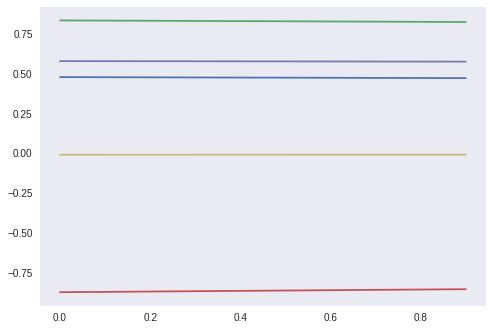

In [ ]:
plt.plot(x,y_app,x, y_csco,x, y_msft,x, y_orcl,x, y_tsla)
plt.show()

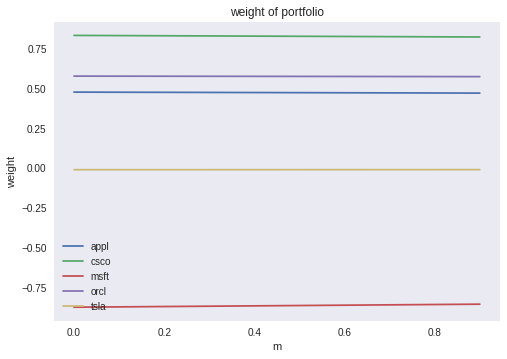

In [ ]:
# line 1 points
x1 = x
y1 = y_app
# plotting the line 1 points
plt.plot(x1, y1, label = "appl")
 
# line 2 points
x2 = x
y2 = y_csco
# plotting the line 2 points
plt.plot(x2, y2, label = "csco")

x3 = x
y3 = y_msft
plt.plot(x3, y3, label = "msft")

x4 = x
y4 = y_orcl
plt.plot(x4, y4, label = "orcl")

x5 = x
y5 = y_tsla
plt.plot(x5, y5, label = "tsla")
 
# naming the x axis
plt.xlabel('m')
# naming the y axis
plt.ylabel('weight')
# giving a title to my graph
plt.title('weight of portfolio')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

วิเคราะห์

------------------

ในข้อนี้จะลองเปลี่ยนค่า m ไปหลาย ๆ ค่าแล้วพล็อตดู ในที่นี้จะเห็นว่ามันแทบไม่เปลี่ยนค่า Weight เลย

### 2.1 // m= global

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 69/124
# หาค่า m แบบสำหรับคิดจากค่า global
m =B/A #minimum
m

array([[45.49941173]])

In [ ]:
SD = [[6.405203,0,0,0,0],[0,7.086673,0,0,0],[0,0,18.058698,0,0],[0,0,0,3.463687,0],[0,0,0,0,7.010854]]
SD

[[6.405203, 0, 0, 0, 0],
 [0, 7.086673, 0, 0, 0],
 [0, 0, 18.058698, 0, 0],
 [0, 0, 0, 3.463687, 0],
 [0, 0, 0, 0, 7.010854]]

In [ ]:
# import pandas as pd
import pandas as pd
sd = pd.DataFrame(SD)
sd

,0,1,2,3,4
0,6.405203,0.000000,0.000000,0.000000,0.000000
1,0.000000,7.086673,0.000000,0.000000,0.000000
2,0.000000,0.000000,18.058698,0.000000,0.000000
3,0.000000,0.000000,0.000000,3.463687,0.000000
4,0.000000,0.000000,0.000000,0.000000,7.010854


In [ ]:
import numpy as np
one_tran = [[1,1,1,1,1]]
one_tran = np.array(one_tran)
one_tran

array([[1, 1, 1, 1, 1]])

In [ ]:
one = [[1],[1],[1],[1],[1]]
one = np.array(one)
one

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
#cov = cov.to_numpy()
cov_inv = np.linalg.inv(cov) 

In [ ]:
A = np.matmul(one_tran,cov_inv)
A = np.matmul(A,one)
A

array([[8159.52086181]])

In [ ]:
A.shape

(1, 1)

In [ ]:
mean = data.mean()
mean

AAPL    0.001155
CSCO    0.001271
MSFT    0.001428
ORCL    0.000765
TSLA    0.000648
dtype: float64

In [ ]:
u = [[41.068366],[36.388711],[86.194422],[45.241459],[62.527403]]
u = np.array(u)
u

array([[41.068366],
       [36.388711],
       [86.194422],
       [45.241459],
       [62.527403]])

In [ ]:
u_tran = u.transpose()
u_tran

array([[41.068366, 36.388711, 86.194422, 45.241459, 62.527403]])

In [ ]:
B = np.matmul(u_tran,cov_inv)

In [ ]:
B = np.matmul(B,one)
B

array([[371253.39924792]])

In [ ]:
C = np.matmul(u_tran,cov_inv)
C = np.matmul(C,u)

In [ ]:
lamda = (A*m - B)/(A*C-B**2)
lamda

array([[0.]])

In [ ]:
gram = (C-B*m)/(A*C-B**2)
gram

array([[0.00012256]])

In [ ]:
# ส่วนข้างบนจะเหมือนเดิม 

# Slide CQF_June_2017_M2L4_Blank: 70/124
# ตรงหา weight จะมีแก้สูตรเป็นตามในสไลด์ 70
wg = np.matmul(cov_inv,one)/A
wg

array([[0.16122301],
       [0.32763303],
       [0.08939531],
       [0.41190243],
       [0.00984622]])

วิเคราะห์

----------------------

ทีนี้ลองมาเปลี่ยนเป็นค่าตาม Global จะเห็นได้ว่าตัวที่น่าลงทุนสุดคือ Orcle,Cisco,Apple, Microsoft and Tesla ได้ค่า weight ทุกตัวเป็นบวก

### 2.1 //tangency

In [ ]:
# หาค่า weight แบบ tangency portfolio
# Slide CQF_June_2017_M2L4_Blank: 79/124
# จะได้สูตร w ออกมาดังนี้
r=0
wt = np.matmul(cov_inv, (u-0*one)/(B-A*r))
wt

array([[-0.32665318],
       [-0.45328416],
       [ 1.58108775],
       [ 0.15738837],
       [ 0.04146122]])

วิเคราะห์

------------------------

เราจะมาหาค่า weight โดยมีการกำหนดจุด Tangency เพื่อบอกถึงตรงที่เหมาะสมที่สุดในการลงทุน จะได้ว่าลงทุนที่ microsoft, Oracle และ Tesla และตัวที่ไม่น่าลงทุนเพราะ Weight ติดลบคือ Apple และ Cisco

### 2.2 risk free rate

m = 0.1

In [ ]:
# หาค่า weight แบบมี risk free rate

# ตามโจทย์ให้ 
r = 0.02
m = 0.1

# ในสูตรการคำนวณ lamda มันจะมีใช้ส่วนนี้ แต่ในที่นี้จะคิดไปทีละก้อน
# Slide CQF_June_2017_M2L4_Blank: 76/124
tmp = u-r*one
tmp

array([[41.048366],
       [36.368711],
       [86.174422],
       [45.221459],
       [62.507403]])

In [ ]:
# คิด lamda ต่อ
tmp_tran = tmp.transpose()
tmp_tran

array([[41.048366, 36.368711, 86.174422, 45.221459, 62.507403]])

In [ ]:
# คิด lamda ต่อ
mul1 = np.matmul(tmp_tran, cov_inv)
mul2 = np.matmul(mul1,(u-r*one))
lamda = (m-r)/mul2

# หาค่า weight แบบมี r โดยใช้สูตรตามสไลด์
# Slide CQF_June_2017_M2L4_Blank: 75/124
wr = np.matmul(lamda*cov_inv,(u-r*one))
wr

array([[-2.25240800e-04],
       [-3.12589556e-04],
       [ 1.08996146e-03],
       [ 1.08377392e-04],
       [ 2.85800306e-05]])

m = global

In [ ]:
# ไม่ใช้ r ในสูตร
wg = np.matmul(cov_inv,one)/A
wg

array([[0.16122301],
       [0.32763303],
       [0.08939531],
       [0.41190243],
       [0.00984622]])

In [ ]:
wg.sum()

0.9999999999999998

tangency

In [ ]:
# trangency แบบมี r 

# Slide CQF_June_2017_M2L4_Blank: 80/124
# จะได้สูตรคำนวณ weight ตามนี้
wtr = np.matmul(cov_inv, (lamda*u + gram*one))
wtr 

array([[0.16099782],
       [0.32732054],
       [0.0904853 ],
       [0.41201093],
       [0.0098748 ]])

In [ ]:
wtr.sum()

1.0006893915589943

วิเคราะห์

-------------------

เป็นการหาค่า weight แบบให้ Risk free rate มาเท่ากับ 0.02 ซึ่งจะได้ว่าตัวที่น่าลงทุนคือ Oracle Cisco Apple Microsoft Tesla ตามลำดับ จากที่สังเกตได้คือถ้าใช้ค่า m เป็น Global จะได้ว่าไม่มีตัวไหนเสี่ยง คือหุ้นทุกตัวจะได้ค่าเป็นบวก

### 2.3

In [ ]:
# graph 

Text(0, 0.5, 'daily returns')

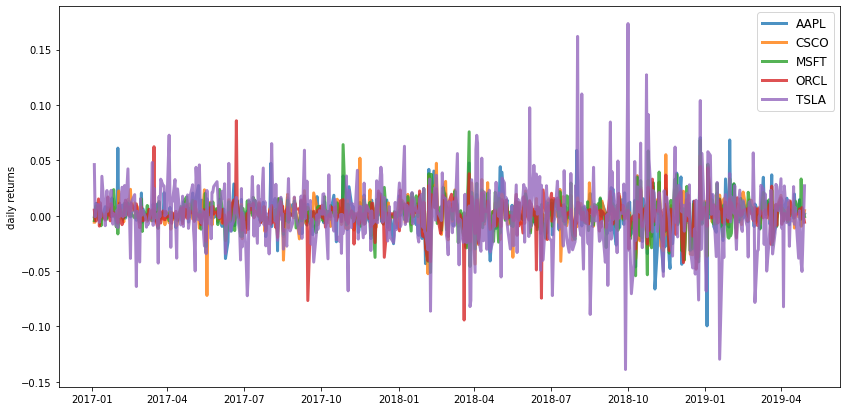

In [ ]:
# ดูกราฟ return
returns = data
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

วิเคราะห์ 

-----------------

ถ้าดูจากราฟรีเทิร์นคือจะเห็นว่าหุ้นของ Tesla มีการเปลี่ยนแปลงค่อนข้างสูง ซึ่งจะดูเสี่ยงเพราะราคาไม่นิ่ง มีความผันผวนสูง

In [ ]:
# เตรียมข้อมูลสำหรับหา efficient frontier
returns = data
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 250
risk_free_rate = 0.0178

In [ ]:
cov_matrix

,AAPL,CSCO,MSFT,ORCL,TSLA
AAPL,0.000242,0.000113,0.000141,0.000079,0.000140
CSCO,0.000113,0.000178,0.000125,0.000082,0.000119
MSFT,0.000141,0.000125,0.000199,0.000097,0.000135
ORCL,0.000079,0.000082,0.000097,0.000178,0.000096
TSLA,0.000140,0.000119,0.000135,0.000096,0.000936


In [ ]:
table = data_full["Adj Close"]

In [ ]:
table.head()

,AAPL,CSCO,MSFT,ORCL,TSLA
Date,,,,,
2017-01-03,27.372362,26.315329,58.291969,35.795979,43.397999
2017-01-04,27.341724,26.158899,58.031147,35.972408,45.397999
2017-01-05,27.480770,26.219732,58.031147,35.879543,45.349998
2017-01-06,27.787130,26.271877,58.534157,35.703121,45.801998
2017-01-09,28.041647,26.228422,58.347855,36.241684,46.256001


In [ ]:
selected = ['AAPL', 'CSCO', 'MSFT', 'ORCL', 'TSLA']

In [ ]:
# โค้ดสำหรับทำกราฟ efficient frontier 

returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# ได้ covarice return ของหุ้น
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [ ]:
# โค้ดสำหรับทำกราฟ efficient frontier 
# เตรียม list เอาไว้เก็บค่าที่ได้
port_returns = []
port_volatility = []
stock_weights = []

num_assets = len(selected)
num_portfolios = 50000


for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

df = pd.DataFrame(portfolio)

column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

df = df[column_order]

df.head()

,Returns,Volatility,AAPL weight,CSCO weight,MSFT weight,ORCL weight,TSLA weight
0,0.262788,0.188907,0.453880,0.045371,0.139172,0.309683,0.051894
1,0.284915,0.196664,0.402319,0.152328,0.231304,0.106464,0.107585
2,0.278507,0.200331,0.299072,0.203076,0.225344,0.103854,0.168653
3,0.245359,0.205489,0.250581,0.197930,0.069042,0.248886,0.233561
4,0.235879,0.238998,0.204628,0.128782,0.113490,0.196240,0.356861


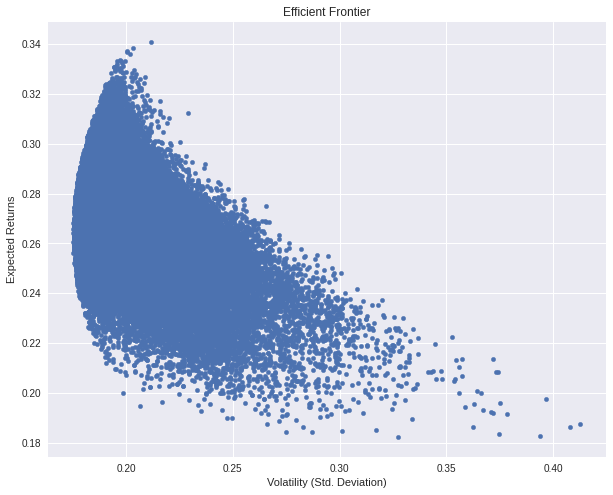

In [ ]:
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

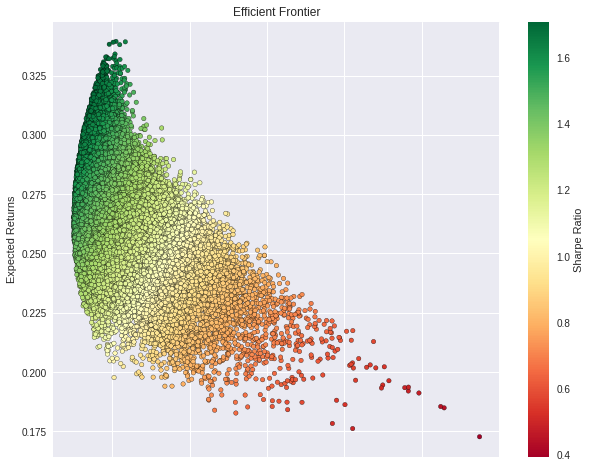

In [ ]:
# โค้ดสำหรับทำกราฟ efficient frontier อันนี้แบบมีสีช่วยบอกระดับ
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

num_assets = len(selected)
num_portfolios = 50000

np.random.seed(101)

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

df = pd.DataFrame(portfolio)

column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

df = df[column_order]

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

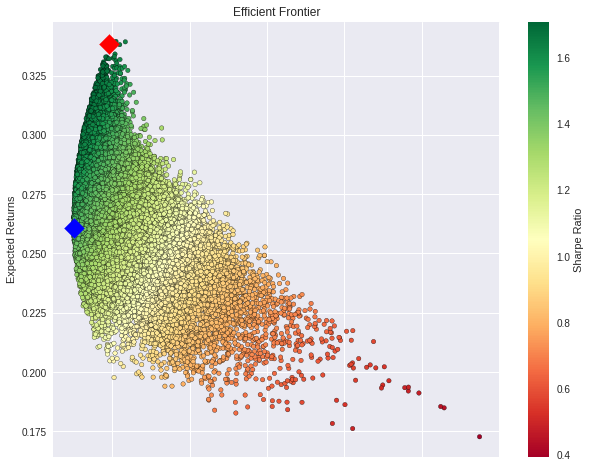

In [ ]:
# โค้ดสำหรับทำกราฟ efficient frontier แบบเพิ่มจุดบอกค่า Global กับ tangency
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
# สีน้ำเงิน =  Global Minimum Variance Portfolio 
# สีแดง = Tangency Portfolio (Max sharpe_portfolio)

วิเคราะห์

---------------------

จะได้จุที่เรียกว่า Global Minimum Variance Portfolio หรือว่าคือจุดที่เสี่ยงน้อยสุดในการลงทุน ซึ่งไม่ควรลงทุนน้อยกว่านี้ไม่งั้นมันจะเสี่ยงมาก ซึ่งในที่นี้จะอยู่ที่ Expected return 0.260 หมายความว่าเราสามารถคาดหวังผลตอบแทนได้ที่จุดนี้ วึ่งจะเป็นจุดที่คุ้มที่จะลงทุน (จากกราฟคือจุดสีเขียวคือคุ้มที่จะลงทุน ไล่ลงมาตาม Sharpe ratio) 

และมีจุ Tangency คือจุดที่เหมาะสมที่สุดในการเสี่ยง ซึ่งจะมีค่า return ที่มากกว่า Global และมี std มากกว่า หมายความว่ามีโอกาสที่จะแปรผันมากหรือได้กำไรมาก แต่ก็มีดอกาสที่จะขาดทึนเหมือนกัน โดยจุดนี้คือเหมาะสมสุด มีค่า return อยู่ที่ 0.335

In [ ]:
#ref: https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94

### 2.4 

In [ ]:
#โจทย์กำหนด lamda = 0.5
lamda = 0.5
gramma = (lamda - B)/A
r = 0
w = (cov_inv.dot(u+gramma*one))/lamda
w

array([[-362251.22465697],
       [-579835.9962452 ],
       [1107591.86733385],
       [-188978.00770959],
       [  23474.36127791]])

In [ ]:

w.sum()

1.0000000002655725

In [ ]:
# โจทย์กำหนด lamda = 1.2
lamda = 1.2
gramma = (lamda - B)/A
r = 0
#w = np.matmul(cov_inv,(u+gramma*one))/lamda
w = (cov_inv.dot(u+gramma*one))/lamda
w

array([[-150937.91622698],
       [-241598.14064957],
       [ 461496.66353637],
       [ -78740.59626925],
       [   9780.98960943]])

In [ ]:
w.sum()

0.9999999999872671

In [ ]:
# โจทย์กำหนด lamda = 2.3
lamda = 2.3
gramma = (lamda - B)/A
r = 0
w = np.matmul(cov_inv,(u+gramma*one))/lamda
w

array([[ -78750.14005525],
       [-126051.04712311],
       [ 240780.9106863 ],
       [ -41081.85323062],
       [   5103.12972267]])

In [ ]:
w.sum()

1.0

วิเคราะห์

---------------------

ในข้อนี้เขาจะมีการเปลี่ยนค่า Lamda จากที่สังเกตได้คือถ้าค่า lamda สูงมากขึ้นเท่าไหร่พวกค่า weight สำหรับการลงทุนในพอร์ทนี้จะกระจายกันมากขึ้น คือจะไม่่ค่อยกระจุกอยู่ที่ไม่กี่ตัว ตัว weight ของตัวหุ้นที่มากสุดจะน้อยลง

### 2.5

In [ ]:
# โจทย์กำหนด lamda = 0.5
lamda = 0.5
r = 0.02
w = np.matmul(cov_inv,(u-r*one))/lamda
w

array([[-242594.82588116],
       [-336673.50216563],
       [1173939.22631077],
       [ 116727.49611216],
       [  30782.02328522]])

In [ ]:
w.sum(0)

array([742180.41766136])

In [ ]:
# โจทย์กำหนด lamda = 1.2
lamda = 1.2
r = 0.02
w = np.matmul(cov_inv,(u-r*one))/lamda
w

array([[-101081.17745048],
       [-140280.62590235],
       [ 489141.34429616],
       [  48636.4567134 ],
       [  12825.84303551]])

In [ ]:
w.sum(0)

array([309241.84069223])

In [ ]:
# โจทย์กำหนด lamda = 2.3
lamda = 2.3
r = 0.02
w = np.matmul(cov_inv,(u-r*one))/lamda
w

array([[-52738.00562634],
       [-73189.89177514],
       [255204.17963278],
       [ 25375.54263308],
       [  6691.74419244]])

In [ ]:
w.sum()

161343.56905681756

วิเคราะห์

----------------------

รอบนี้จะคิดเปลียน lamda และมีค่า risk free ซึ่งตะได้ว่าค่ารวม weight มันจะไม่ได้รวมเท่ากับ 1 แล้ว แต่ว่าค่า weight โดยรวม ตัวที่มีค่า weight มากสุดก็จะน้อยลงเพราะว่ามันเหมือนจะกระจายกันไปเรื่อยๆ 

### 2.6

In [ ]:
# graph

In [ ]:
u

array([[41.068366],
       [36.388711],
       [86.194422],
       [45.241459],
       [62.527403]])

In [ ]:
u.shape

(5, 1)

In [ ]:
SD

[[6.405203, 0, 0, 0, 0],
 [0, 7.086673, 0, 0, 0],
 [0, 0, 18.058698, 0, 0],
 [0, 0, 0, 3.463687, 0],
 [0, 0, 0, 0, 7.010854]]

In [ ]:
lam_array = np.arange(0.1,5,1/100)
v_arr = []
for i in lam_array:
  lam = i
  gramma = (lam - B)/A
  w = np.matmul(cov_inv,(u+gramma*one))/lam
  # wt = np.matmul(cov_inv, (u-0*one)/(B-A*r)) 
  #v_arr.append(u*w-(0.5*np.matmul(np.transpose(w),(np.matmul(cov,w)))))
  v_arr.append(w)

  #print(np.dot(u,w))

In [ ]:
w.shape

(5, 1)

In [ ]:
u*w

array([[-1490682.00602146],
       [-2114166.07554236],
       [ 9565962.92695671],
       [ -856660.66581115],
       [  147073.78521099]])

In [ ]:
v_arr = mean_data = np.array(v_arr)
v_arr

array([[[-1.81125677e+06],
        [-2.89918129e+06],
        [ 5.53795898e+06],
        [-9.44891686e+05],
        [ 1.17371767e+05]],

       [[-1.64659705e+06],
        [-2.63561933e+06],
        [ 5.03450817e+06],
        [-8.58992405e+05],
        [ 1.06701607e+05]],

       [[-1.50938061e+06],
        [-2.41598436e+06],
        [ 4.61496583e+06],
        [-7.87409670e+05],
        [ 9.78098075e+04]],

       ...,

       [[-3.64436402e+04],
        [-5.83333066e+04],
        [ 1.11427834e+05],
        [-1.90115015e+04],
        [ 2.36161462e+03]],

       [[-3.63704598e+04],
        [-5.82161707e+04],
        [ 1.11204083e+05],
        [-1.89733250e+04],
        [ 2.35687244e+03]],

       [[-3.62975728e+04],
        [-5.80995044e+04],
        [ 1.10981229e+05],
        [-1.89353015e+04],
        [ 2.35214927e+03]]])

In [ ]:
v_app = v_arr[:,0]
v_csco = v_arr[:,1]
v_msft = v_arr[:,2]
v_orcl = v_arr[:,3]
v_tsla  = v_arr[:,4]

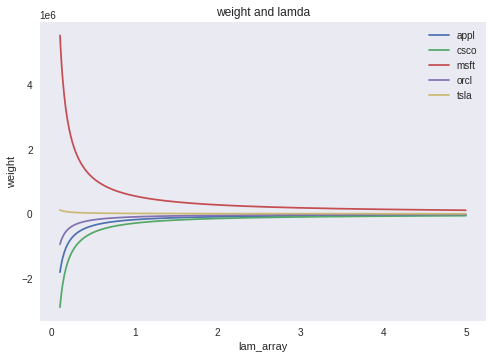

In [ ]:
# line 1 points
x1 = lam_array
y1 = v_app
# plotting the line 1 points
plt.plot(x1, y1, label = "appl")
 
# line 2 points
x2 = lam_array
y2 = v_csco
# plotting the line 2 points
plt.plot(x2, y2, label = "csco")

x3 = lam_array
y3 = v_msft
plt.plot(x3, y3, label = "msft")

x4 = lam_array
y4 = v_orcl
plt.plot(x4, y4, label = "orcl")

x5 = lam_array
y5 = v_tsla
plt.plot(x5, y5, label = "tsla")

# naming the x axis
plt.xlabel('lam_array')
# naming the y axis
plt.ylabel('weight')
# giving a title to my graph
plt.title('weight and lamda')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

วิเคราะห์

-------------
อันนี้เลือก plot weight ออกมาจะได้ว่าถ้าเกิดยิ่ง lamda มากจะได้ว่า weight แต่ละตัวมันจะยิ่งกระจายกันมาที่ตรงกลางมากขึ้นอย่างที่ได้บอกไปในพาทคำนวณ อย่างถ้า lamda ใกล้ 0 ตัว microsoft จะมี weight สูงมาก แต่ถ้าเพิ่ม lamda เรื่อยๆ weight ก็จะกระจายกันลงมา

## 3. Repeat 2

แบบคิดจาก historical data
Ref: https://randerson112358.medium.com/python-for-finance-portfolio-optimization-66882498847

In [ ]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 2.8 MB/s 
     |████████████████████████████████| 2.7 MB 7.2 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
# จากการสืบค้นพบว่ามี lib pypfopt อันนี้ที่ช่วยคำนวณพวกเรื่อง portfolio อย่างน่าสนใจ
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(table)#returns.mean() * 252
S = risk_models.sample_cov(table) #Get the sample covariance matrix

In [ ]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.0), ('CSCO', 0.4025), ('MSFT', 0.5975), ('ORCL', 0.0), ('TSLA', 0.0)])
Expected annual return: 37.7%
Annual volatility: 20.1%
Sharpe Ratio: 1.78


(0.37706878162441576, 0.20070604979667198, 1.7790633714636364)

วิเคราะห์

-----------------

จะได้ว่าตัวที่น่าลงทุนสุดคือ Microsoft ลองมาเป็น Cisco ส่วนตัวที่เหลือได้ weight เท่ากับ 0 ดังนั้นอาจจะไม่จำเป็นต้องลงทุน



Efficient_frontier

In [ ]:
# ref: https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html#id3
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(table)
S = CovarianceShrinkage(table).ledoit_wolf()

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [ ]:
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.txt")  # saves to file
print(cleaned_weights)

OrderedDict([('AAPL', 0.0), ('CSCO', 0.41063), ('MSFT', 0.58937), ('ORCL', 0.0), ('TSLA', 0.0)])


In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 37.7%
Annual volatility: 20.1%
Sharpe Ratio: 1.78


(0.376657597583765, 0.20062970814853606, 1.7776908558313496)

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))

In [ ]:
# อันนี้แบบเปลี่ยน target return ได้ (ค่า m)
ef.efficient_return(target_return=0.2, market_neutral=True)

OrderedDict([('AAPL', -0.1603563813429063),
             ('CSCO', 0.2202402679330501),
             ('MSFT', 0.7342498166664979),
             ('ORCL', -0.5995906099679102),
             ('TSLA', -0.1945430932887316)])

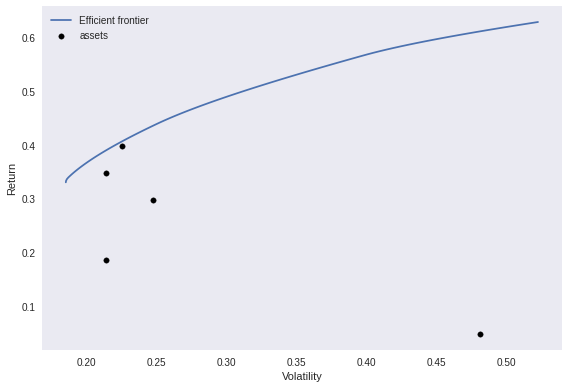

In [ ]:
# Plot efficient_frontier
from pypfopt import plotting
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

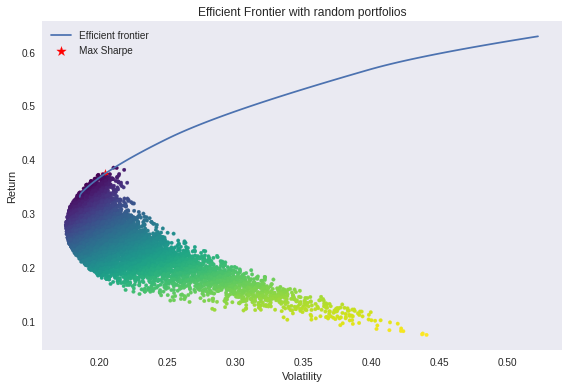

In [ ]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

วิเคราะห์ 

------------------

จากกราฟจะได้ว่าจุดที่น่าลงทุนสุดคือตรงที่เป็นดาวสีแดง เรียกว่า Max Sharp หรือจุดที่ลงทุนแล้วคุ้มทุนสุด

## 4. Use Black-Litterman

In [ ]:
!pip install --upgrade pandas_datareader
from pandas_datareader import data

     |████████████████████████████████| 109 kB 39.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
# เตรียมชื่อข้อมูล
tickers = ['AAPL', 'CSCO', 'MSFT', 'ORCL', 'TSLA']
m_cap = data.get_quote_yahoo(tickers)['marketCap']


In [ ]:
# หาค่า Wm ด้วยสูจรด้านล่าง
wm = m_cap/m_cap.sum()
wm

AAPL    0.408851
CSCO    0.040007
MSFT    0.382160
ORCL    0.041329
TSLA    0.127652
Name: marketCap, dtype: float64

In [ ]:
# เดิมข้อมูลที่ได้มาจะอยู่ในรูป (1,5) ซึ่งจริงๆต้องเก็บในรูปของ (5,1)
wm = np.mat(wm)
wm = wm.transpose()
wm

matrix([[0.40885129],
        [0.04000666],
        [0.38216034],
        [0.04132927],
        [0.12765245]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 101/124
# หาค่า std
sdm = np.matmul(np.transpose(wm),cov)
sdm = np.matmul(sdm,wm)
sdm

matrix([[92.71911285]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 101/124
lamm = 1/sdm*0.5
lamm

matrix([[0.00539263]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 102/124
eq_vec = lam*np.matmul(cov,wm)
eq_vec

matrix([[281.94967666],
        [315.10914672],
        [853.52346856],
        [116.98455363],
        [ 29.52326748]])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 105/124
t = 1/730 # จำนวนวันในข้อมูล
tcov = t*cov
tcov

array([[ 0.05620085,  0.04801619,  0.13450657,  0.01818837,  0.00272414],
       [ 0.04801619,  0.0687958 ,  0.16882543,  0.02144337, -0.01005945],
       [ 0.13450657,  0.16882543,  0.44673505,  0.05738001, -0.00417185],
       [ 0.01818837,  0.02144337,  0.05738001,  0.01643442,  0.00950228],
       [ 0.00272414, -0.01005945, -0.00417185,  0.00950228,  0.06733161]])

In [ ]:
tcov.shape

(5, 5)

In [ ]:
# เป็นตัวข้อมูลที่เราอยากเปรีนยเทียบ 
P = [[1,0,-1,0,0],  
     [0,0,0,1,0],
     [0,-1,0,0,1]]

# [1,0,-1,0,0] คือการเทียบ APPlE กับ Microsoft ดดยคาดว่า Apple จะน่าลงทุนกว่า Microsoft
# [0,0,0,1,0] จะดูแนวโน้มถ้าลงมุนใน Tesla
# [0,-1,0,0,1] คือการเทียบ Cisco กับ Tesla ดดยคาดว่า Tesla จะน่าลงทุนกว่า Cisco

In [ ]:
P = np.array(P)

In [ ]:
# เป็นค่า specific return
q = [[0.02],
     [0.04],
     [0.60]]

In [ ]:
q = np.array(q)

In [ ]:
Pt = P.transpose()

In [ ]:
Pt

array([[ 1,  0,  0],
       [ 0,  0, -1],
       [-1,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  1]])

In [ ]:
Pt.shape

(5, 3)

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 107/124
ohm = np.diag(np.matmul(np.matmul(P,tcov),Pt))
ohm

array([0.23392277, 0.01643442, 0.1562463 ])

In [ ]:
# Slide CQF_June_2017_M2L4_Blank: 107/124
ohm = np.diag(np.diag(np.matmul(np.matmul(P,tcov),Pt)))
ohm

array([[0.23392277, 0.        , 0.        ],
       [0.        , 0.01643442, 0.        ],
       [0.        , 0.        , 0.1562463 ]])

In [ ]:
ohmiv = np.linalg.inv(ohm)

In [ ]:
tcov.transpose()

array([[ 0.05620085,  0.04801619,  0.13450657,  0.01818837,  0.00272414],
       [ 0.04801619,  0.0687958 ,  0.16882543,  0.02144337, -0.01005945],
       [ 0.13450657,  0.16882543,  0.44673505,  0.05738001, -0.00417185],
       [ 0.01818837,  0.02144337,  0.05738001,  0.01643442,  0.00950228],
       [ 0.00272414, -0.01005945, -0.00417185,  0.00950228,  0.06733161]])

In [ ]:
# เนื่องจากในการคำนวณหา R มันค่อนข้างยาวเลยจะตัดออกเป็นสองส่วนตามก้อนคั่นด้วย + 

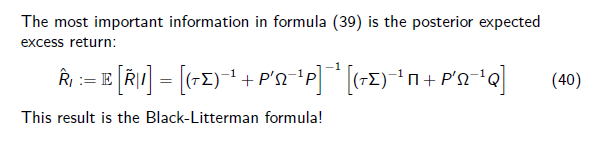

In [ ]:
R1 = np.linalg.inv(tcov) + np.matmul(np.matmul(Pt,ohmiv),P)
R1

array([[  75.76748099,   44.48532973,  -41.42683615,   -9.0281841 ,
           2.72588375],
       [  44.48532973,  298.13808439, -117.95533537,  -41.36248238,
          33.91501075],
       [ -41.42683615, -117.95533537,   62.11057393,    0.3712861 ,
         -12.58851639],
       [  -9.0281841 ,  -41.36248238,    0.3712861 ,  198.98024126,
         -25.28549381],
       [   2.72588375,   33.91501075,  -12.58851639,  -25.28549381,
          29.95335566]])

In [ ]:
R1 = np.linalg.inv(R1)
R1

array([[0.03654633, 0.01951304, 0.06267719, 0.00640126, 0.00632536],
       [0.01951304, 0.02583991, 0.06210847, 0.00617687, 0.00028336],
       [0.06267719, 0.06210847, 0.17847855, 0.01712963, 0.01344261],
       [0.00640126, 0.00617687, 0.01712963, 0.00730363, 0.00578816],
       [0.00632536, 0.00028336, 0.01344261, 0.00578816, 0.04302446]])

In [ ]:
q

array([[0.02],
       [0.04],
       [0.6 ]])

In [ ]:
tcov

array([[ 0.05620085,  0.04801619,  0.13450657,  0.01818837,  0.00272414],
       [ 0.04801619,  0.0687958 ,  0.16882543,  0.02144337, -0.01005945],
       [ 0.13450657,  0.16882543,  0.44673505,  0.05738001, -0.00417185],
       [ 0.01818837,  0.02144337,  0.05738001,  0.01643442,  0.00950228],
       [ 0.00272414, -0.01005945, -0.00417185,  0.00950228,  0.06733161]])

In [ ]:
eq_vec

matrix([[281.94967666],
        [315.10914672],
        [853.52346856],
        [116.98455363],
        [ 29.52326748]])

In [ ]:
np.matmul(np.linalg.inv(tcov),eq_vec)

matrix([[1489.32258002],
        [ 145.73224998],
        [1392.09546709],
        [ 150.55012823],
        [ 464.99957468]])

In [ ]:
np.matmul(np.matmul(Pt,np.linalg.inv(ohm)),q)

array([[ 0.0854983 ],
       [-3.84009087],
       [-0.0854983 ],
       [ 2.43391636],
       [ 3.84009087]])

In [ ]:
R2 = np.matmul(np.linalg.inv(tcov),eq_vec) + np.matmul(np.matmul(Pt,np.linalg.inv(ohm)),q)
R2

matrix([[1489.40807833],
        [ 141.89215911],
        [1392.00996879],
        [ 152.98404458],
        [ 468.83966555]])

In [ ]:
R = np.matmul(R1,R2)
R

matrix([[148.39327658],
        [120.26278182],
        [359.53152708],
        [ 38.08620859],
        [ 49.23055813]])

In [ ]:
wb = np.matmul(np.linalg.inv(cov),R)/lamm
wb

matrix([[ 607.62929435],
        [ -79.43991458],
        [ 124.32282918],
        [-549.83249498],
        [ 234.58104602]])

In [ ]:
wb.sum()

337.2607599791944

วิเคราะห์

--------------------

อันนี้ลองเทียบเองโดยกำหนดตัว P เองว่าจะเทียบอะไรกับอะไร โดยให้ตัวที่มีโอกาสน่าลงทุนกว่าเป็น 1 น้อยหว่าเป็น -1 ถ้าดูแค่ตัวเองก็มีแค่ 1 ตัวเดียวใน row นั้น ๆ  จากนั้นกำหนดค่าเปอร์เซนท์ที่คิดว่าอันนั้นจะดีว่า/ น่าลงทุนกว่าใน q ทีนี้ทำการพล็อตแล้วจะได้ว่าตัวที่น่าลงทุนที่สุดคือ Apple ตามมาด้วย Microsoft Tesla ตัวที่ไม่นาลงทุนเลย ซึงติดลบเยอะมาคือ Cisco และ Orcle
